In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

# How to get temperature data in sql
## Get global data sql query
```sql
SELECT * FROM global_data
```

## Get Soeul data sql query
```sql
SELECT * FROM city_data
WHERE city = 'Seoul'
```

# How to read data using python

* Temperature data download csv-file

* Dataset load `DataFrame` of Pandas

In [7]:
globalData = pd.read_csv("global_data.csv")
seoulData = pd.read_csv("seoul_data.csv")

print("Global Data Shape: {}".format(globalData.shape))
print("Seoul Data Shape: {}".format(seoulData.shape))


Global Data Shape: (266, 2)
Seoul Data Shape: (175, 4)


# Overview dataset

In [8]:
print(seoulData.head(10))
print("\n")
print(globalData.head(10))


   year   city      country  avg_temp
0  1839  Seoul  South Korea      9.47
1  1840  Seoul  South Korea     10.21
2  1841  Seoul  South Korea      9.44
3  1842  Seoul  South Korea     10.13
4  1843  Seoul  South Korea     10.33
5  1844  Seoul  South Korea     10.15
6  1845  Seoul  South Korea     10.25
7  1846  Seoul  South Korea     10.57
8  1847  Seoul  South Korea     10.59
9  1848  Seoul  South Korea     10.36


   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47
5  1755      8.36
6  1756      8.85
7  1757      9.02
8  1758      6.74
9  1759      7.99


# Calculate Moving Average and Transform DataFrame

In [9]:
def CalculateMovingAverage(df, windowSize = 7):
    data =[]
    for i in range(windowSize, df.shape[0] - windowSize):
        data.append([df.year[i], pd.DataFrame.sum(df.avg_temp[i - windowSize:i])/windowSize])

    dfTemp = pd.DataFrame(data = data, columns = ("year", "avg_temp"))
    return dfTemp

dfGlobal = CalculateMovingAverage(globalData, 7)
dfSeoul = CalculateMovingAverage(seoulData, 7)

# Visualization Data using Matplotlib

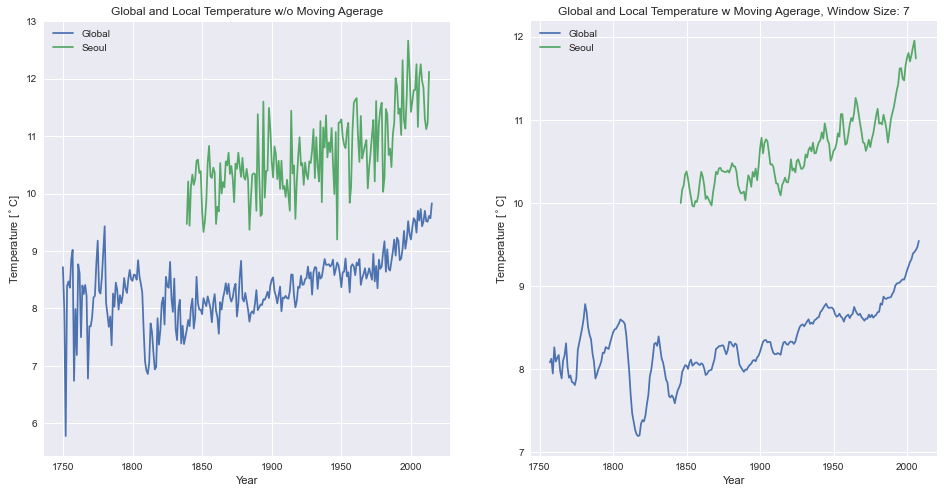

In [10]:
fig, ax = plt.subplots(1,2, figsize = (16, 8))

ax[0].plot(globalData.year, globalData.avg_temp, label = "Global")
ax[0].plot(seoulData.year, seoulData.avg_temp, label = "Seoul")
ax[0].set_title("Global and Local Temperature w/o Moving Agerage")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Temperature [$^\circ$C]")
ax[0].legend()

ax[1].plot(dfGlobal.year, dfGlobal.avg_temp, label = "Global")
ax[1].plot(dfSeoul.year, dfSeoul.avg_temp, label = "Seoul")
ax[1].set_title("Global and Local Temperature w Moving Agerage, Window Size: 7")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Temperature [$^\circ$C]")
ax[1].legend()

plt.show()

# Observations
* Seoul city is hotter than the world about $2^oC$
* Seoul city temperature is increased $2^oC$ during 150 years
* Global and Seoul city temperatures are increasing since 1900 year
* Seoul city has been observed since 1850